In [8]:
#importing the relevant libraries for data analysis, statistical analysis and plotting
import pandas as pd
import numpy as np
import seaborn as sns



In [9]:
#Reading the data set into dataframe df
df = pd.read_csv(r'C:\Users\Ahsan\badsf\housing_prices_assignment.csv')

In [10]:
#Peeking at the head of the data frame to check values, columns and dimensions
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [22]:
#We remove columns with null values/Missing Data
df_cleaned1 = df.dropna(axis=1)

#We are left with 64 columns in data frame df_cleaned1 after we dropped all columns with missing data

#Removing outliers using uper and lower quantiles based on saleprice
outliers_low = df["SalePrice"].quantile(0.01)
outliers_high  = df["SalePrice"].quantile(0.99)

df_cleaned1 = df_cleaned1[(df_cleaned1["SalePrice"] < outliers_high) & (df_cleaned1["SalePrice"] > outliers_low)]

#Check at the columns/values the types left in the data frame after cleaning
df_cleaned1.info()
df_cleaned1.describe()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 1430 entries, 0 to 1459
Data columns (total 62 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1430 non-null   int64 
 1   MSSubClass     1430 non-null   int64 
 2   MSZoning       1430 non-null   object
 3   LotArea        1430 non-null   int64 
 4   Street         1430 non-null   object
 5   LotShape       1430 non-null   object
 6   LandContour    1430 non-null   object
 7   Utilities      1430 non-null   object
 8   LotConfig      1430 non-null   object
 9   LandSlope      1430 non-null   object
 10  Neighborhood   1430 non-null   object
 11  Condition1     1430 non-null   object
 12  Condition2     1430 non-null   object
 13  BldgType       1430 non-null   object
 14  HouseStyle     1430 non-null   object
 15  OverallQual    1430 non-null   int64 
 16  OverallCond    1430 non-null   int64 
 17  YearBuilt      1430 non-null   int64 
 18  YearRemodAdd   1430 non-null

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1430.000000,1430.00000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,...,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000
mean,729.283217,57.15035,10459.733566,6.095105,5.594406,1971.417483,1984.988112,439.536364,47.148951,565.776224,...,94.218182,45.988112,22.076923,3.481119,14.690210,2.428671,41.916084,6.342657,2007.808392,178410.365734
std,422.576207,42.44259,9973.411232,1.311804,1.099257,29.958307,20.477450,446.544496,162.345952,439.891421,...,124.807462,64.731133,61.443275,29.619266,54.730613,37.873812,492.854008,2.694381,1.325716,68746.752201
min,1.000000,20.00000,1300.000000,3.000000,2.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,62383.000000
25%,361.250000,20.00000,7544.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,220.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130000.000000
50%,729.500000,50.00000,9468.500000,6.000000,5.000000,1973.000000,1994.000000,384.000000,0.000000,475.000000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1094.750000,70.00000,11509.000000,7.000000,6.000000,2000.000000,2004.000000,706.000000,0.000000,808.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213000.000000
max,1460.000000,190.00000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,440000.000000


In [12]:
#A Function to Find and print The correlation between the numerical features and corr_target

def Find_print_correlation (list_of_features, corr_target):
    correlation_features = list_of_features.corr()
    print (correlation_features[corr_target].sort_values())
    

In [13]:
#Finding features that are numerical
number_features = df.select_dtypes(include=[np.number])
#Calling above defined function to print correlation values
Find_print_correlation(number_features, 'SalePrice')

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePr

In [23]:
#lets use the top 4 most positively correlated and negatively correlated numeric values to predict the sales price using regression
feature_names = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'KitchenAbvGr', 'EnclosedPorch', 'MSSubClass' , 'OverallCond']
X = df_cleaned1[feature_names]
y = np.log(df_cleaned1.SalePrice)

X.describe()
# we log transform our predictions because the saleprice data distribution is skewed


,OverallQual,GrLivArea,GarageCars,GarageArea,KitchenAbvGr,EnclosedPorch,MSSubClass,OverallCond
count,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.00000,1430.000000
mean,6.095105,1507.180420,1.767832,472.721678,1.046853,22.076923,57.15035,5.594406
std,1.311804,497.884358,0.729715,208.598622,0.221106,61.443275,42.44259,1.099257
min,3.000000,520.000000,0.000000,0.000000,0.000000,0.000000,20.00000,2.000000
25%,5.000000,1134.250000,1.000000,336.000000,1.000000,0.000000,20.00000,5.000000
50%,6.000000,1464.000000,2.000000,479.500000,1.000000,0.000000,50.00000,5.000000
75%,7.000000,1768.000000,2.000000,576.000000,1.000000,0.000000,70.00000,6.000000
max,10.000000,5642.000000,4.000000,1418.000000,3.000000,552.000000,190.00000,9.000000


In [15]:
#We import the relevant library features
from sklearn.model_selection import train_test_split

#Seperating/dividing our data into test/training data sets with 30/70 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [16]:
#import the required library
from sklearn.ensemble import RandomForestRegressor


model = RandomForestRegressor() #define model

model.fit(X_train, y_train) #fit the model to the data (AKA TRAINING)

print('Accuracy of Random Forest Regressor on training set: {:.2f}'.format(model.score(X_train, y_train))) #accuracy on training data
print('Accuracy of Random Forest Regressor on test set: {:.2f}'.format(model.score(X_test, y_test))) #accuracy on test data
print ("R^2 for Random Forest Regressor is: \n", model.score(X_test, y_test))


Accuracy of Random Forest Regressor on training set: 0.97
Accuracy of Random Forest Regressor on test set: 0.78
R^2 for Random Forest Regressor is: 
 0.7791205633485154


In [17]:
#import the required library

from sklearn.metrics import mean_squared_error


actual_values = y_test.tolist() #Actual values of sale price from test data
model_predict = model.predict(X_test) #Predicted values of sale price from test data features

print ('RMSE is: \n', mean_squared_error(actual_values, model_predict))


RMSE is: 
 0.026084451927303368


In [18]:
#import the required library for plotting
import matplotlib.pyplot as plt

#Creating a function to print scatter plot between two lists

def print_scatter_plot (x_list, y_list,xlabel,ylabel,title):
    #Creating a scatter plot with predicted values and actual values
    plt.scatter(x_list, y_list, alpha=.7,color='b') #alpha helps to show overlapping data
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()  

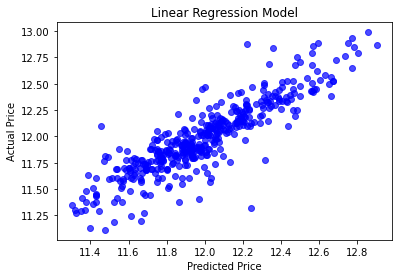

In [19]:

#Calling above defined function to print scatter plot between Actual and Predicted values of sale Price

print_scatter_plot (model_predict, actual_values, 'Predicted Price','Actual Price','Linear Regression Model')


In [20]:
#Printing actual and predicted values for test data along with difference in predictions
for cn in range(0,len(actual_values)):
    print ("Original : %s Predicted: %s - Difference : %s" % (np.exp(actual_values[cn]), np.exp(model_predict[cn]),np.exp(actual_values[cn])- np.exp(model_predict[cn]) ))


Original : 180999.99999999985 Predicted: 185115.39641068544 - Difference : -4115.396410685586
Original : 124999.99999999991 Predicted: 117483.23090412884 - Difference : 7516.769095871074
Original : 249999.99999999983 Predicted: 283879.6668921786 - Difference : -33879.666892178764
Original : 139999.9999999999 Predicted: 127682.02530220663 - Difference : 12317.974697793281
Original : 159999.9999999999 Predicted: 152394.65379086262 - Difference : 7605.346209137293
Original : 86999.99999999997 Predicted: 142077.26316478607 - Difference : -55077.2631647861
Original : 102000.00000000003 Predicted: 134970.74124208762 - Difference : -32970.74124208759
Original : 188000.00000000012 Predicted: 193719.66427353193 - Difference : -5719.664273531816
Original : 129499.99999999991 Predicted: 107414.76053469282 - Difference : 22085.239465307095
Original : 185000.00000000006 Predicted: 191078.85206044314 - Difference : -6078.852060443081
Original : 228949.99999999997 Predicted: 155097.3940205724 - Diffe

We have analyzed US Housing data and tried to make a model for predicting the SalePrice of a house using 8 features given below ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'KitchenAbvGr', 'EnclosedPorch', 'MSSubClass' , 'OverallCond'] We used Random Forest Regressor for our model and after training the model was tested on our test data which gave us an R^2 of 0.778 and a Root Mean Square Error RMSE of 0.0263. This shows that our model is decently good at predicting the SalePrice of the House. Comparison of actual vs predicted values of SalePrice is presented as a log normalized scatter plot as well as raw prediction values and thier difference. 


In [21]:
import pickle
pickle.dump(model, open('./bdsf_model1.pkl', 'wb'))